<a href="https://colab.research.google.com/github/eswarpeddinti98/newproject/blob/main/EXAM%20_03_FashionMNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Get the best results on the [fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset!

> "Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits."

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png">


TASK - Challenge: Get the best results on the fashionMNIST dataset!

The challenge of this task is to get the best results on the fashionMNIST dataset by tuning hyperparameters of the model and observing convergence behavior.

"Best" - for simplicity - means the highest accuracy on the validation set.

"Rules":

    You can change any hyperparameters,
    including the number of layers,
    width of the layers,
    activation functions,
    regularizers (and their parameters),
    optimizer (and it's parameters), but
    you should not change the model architecture, use only fully connected layers! (Even if you know any others... :-P

Added constraint: The model with the "best performance" has to be saved, so it should not be just a printout happening once during training!

And: You may NOT manipulate the validation set! :-P

Happy coding! :-)


# Loading the data

In [5]:
import tensorflow as tf

(train_images, train_labels), (valid_test_images, valid_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# because of some limitations of Keras's softmax implementation, it's
# advisable to normalise the images by dividing the intensities by the
# maximal 255 value
train_images = train_images / 255.

valid_test_images = valid_test_images / 255. # the same normalization for valid and test

valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]

print(train_images.shape, valid_images.shape, test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)


The classes are:
0.   T-shirt/top
1.   Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [6]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's have a look at the first few training images:

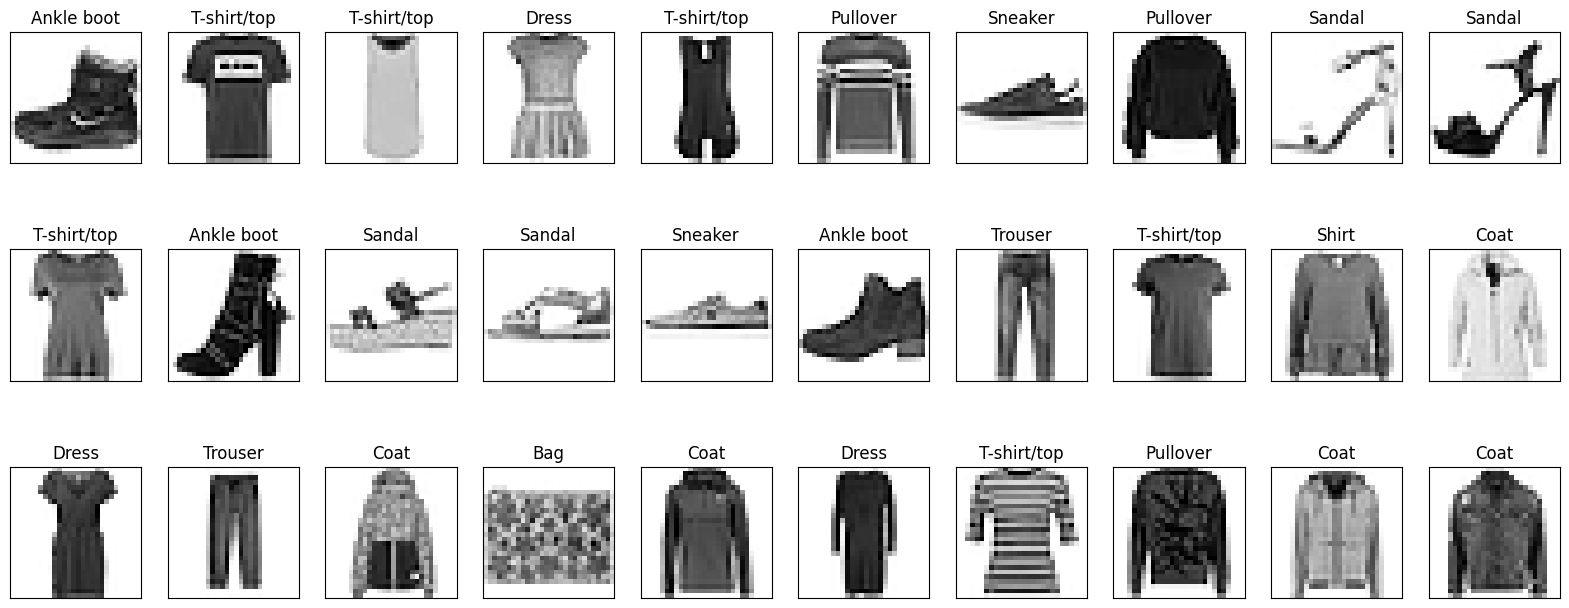

In [7]:
from matplotlib import pyplot as plt
from math import ceil

def show_images(images, labels):
    """Show images in a grid
    """
    n_rows = ceil(len(images) / 10)
    plt.figure(figsize=(20, 8))
    for i, image in enumerate(images):
        ax = plt.subplot(n_rows, 10, i + 1, xticks=[], yticks=[])
        # below we scale the pixel intensities back to display the images correctly
        plt.imshow(image, cmap='Greys')
        plt.title(classes[labels[i]])

show_images(train_images[:30], train_labels[:30])
plt.show();

Transform images with size of 22x22 to array of 784, so it can be used as input of the network

In [8]:
def reshape(images):
    images = images.reshape(images.shape[0], -1)
    return images

train_images = reshape(train_images)
valid_images = reshape(valid_images)
test_images = reshape(test_images)

print(train_images.shape, valid_images.shape, test_images.shape)

(60000, 784) (5000, 784) (5000, 784)


# Model

We set the random seeds to get (as far as possible) reproducible results:

In [9]:
# Fix seeds for (hopefully) reproducible results
from numpy.random import seed
import tensorflow as tf

seed(14)
tf.random.set_seed(19)

## Network

In [26]:
# TODO: Try different models with different number of hidden layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Define the model with examples of activation functions
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),   # First hidden layer with 64 neurons and ReLU activation
    # Dense(64, activation='sigmoid', input_shape=(784,)),  # Example: Sigmoid activation - outputs values between 0 and 1
    # Dense(64, activation='tanh', input_shape=(784,)),     # Example: Tanh activation - centers data around 0
    # Dense(32, activation='relu'),                       # Second hidden layer with 32 neurons and ReLU activation
    Dense(10, activation='softmax')                     # Output layer with 10 neurons for 10 classes, using Softmax for probabilities
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Loss, optimization and compilation

In [27]:
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Compile the model with examples of optimizers and learning rates
model.compile(
    optimizer=Adam(learning_rate=0.00001),  # Adam optimizer - combines benefits of SGD and RMSprop with adaptive learning rate
    # optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD optimizer - standard gradient descent with learning rate and momentum
    # optimizer=RMSprop(learning_rate=0.001),          # RMSprop optimizer - adjusts learning rate based on gradient magnitude
    loss='sparse_categorical_crossentropy',            # Loss function for multi-class classification with integer labels
    metrics=['accuracy']                               # Accuracy metric to evaluate model performance
)

## Training

In [28]:
# TODO: Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=25,
    batch_size=128,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2694 - loss: 2.1355 - val_accuracy: 0.5374 - val_loss: 1.6509
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5758 - loss: 1.5349 - val_accuracy: 0.6240 - val_loss: 1.3072
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6411 - loss: 1.2346 - val_accuracy: 0.6524 - val_loss: 1.1128
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6706 - loss: 1.0625 - val_accuracy: 0.6754 - val_loss: 0.9946
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6908 - loss: 0.9552 - val_accuracy: 0.6960 - val_loss: 0.9142
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7088 - loss: 0.8809 - val_accuracy: 0.7142 - val_loss: 0.8553
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7263 - loss: 0.8259 - val_accuracy: 0.7294 - val_loss: 0.8098
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7397 - loss: 0.7830 - val_accuracy: 0.

## Training Performance

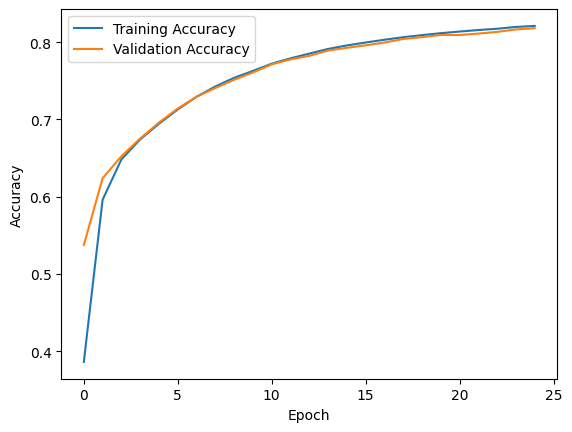

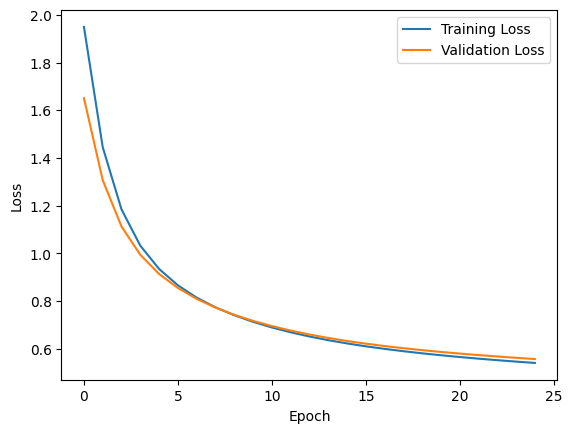

In [29]:
# TODO: Plot loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Quality Check

In [30]:
assert max(history.history['accuracy'])>0.72
assert max(history.history['val_accuracy'])>0.73

## Visualization

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


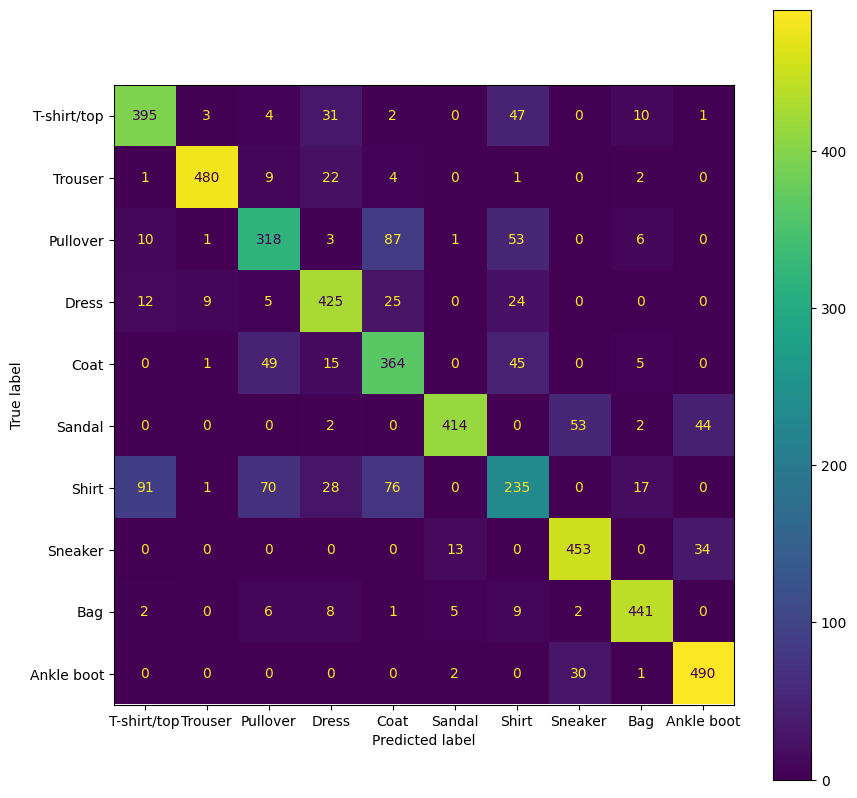

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
predictions = model.predict(test_images)

# Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

# Plot
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       493
           1       0.97      0.92      0.95       519
           2       0.69      0.66      0.68       479
           3       0.80      0.85      0.82       500
           4       0.65      0.76      0.70       479
           5       0.95      0.80      0.87       515
           6       0.57      0.45      0.50       518
           7       0.84      0.91      0.87       500
           8       0.91      0.93      0.92       474
           9       0.86      0.94      0.90       523

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



## Saving the model

In [33]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'